In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
##Data Preprocessing

In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
##Text Preprocessing

In [9]:
import re
import string

convrt uppercase to lowercase

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
data["tweet"].tail(10)

7910    perfect match #instagood #applewatch #red #ins...
7911    i am completely in love with the new iphone em...
7912    tune in. turn on. drop out. & #gtd in one app!...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, dtype: object

Remove links

In [12]:
data["tweet"] = data["tweet"].apply(
    lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x)
)


In [13]:
data["tweet"] = data["tweet"].apply(
    lambda x: x.translate(str.maketrans("", "", string.punctuation))
)


In [14]:
data["tweet"] = data["tweet"].apply(lambda x: re.sub(r"\d+", "", x))


In [15]:
!pip install nltk

In [16]:
import nltk
from nltk.corpus import stopwords


In [17]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
nltk.data.path.append('../static/model')



In [19]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


In [20]:
data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(word for word in x.split() if word.lower() not in stop_words)
)

print(data.head())


   id  label                                              tweet
0   1      0  fingerprint pregnancy test android apps beauti...
1   2      0  finally transparant silicon case thanks uncle ...
2   3      0  love would go talk makememories unplug relax i...
3   4      0  im wired know im george made way iphone cute d...
4   5      1  amazing service apple wont even talk question ...


In [21]:
from nltk.stem import PorterStemmer


In [22]:
stemmer = PorterStemmer()


In [23]:
data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(stemmer.stem(word) for word in x.split())
)

print(data)


        id  label                                              tweet
0        1      0  fingerprint pregnanc test android app beauti c...
1        2      0  final transpar silicon case thank uncl yay son...
2        3      0  love would go talk makememori unplug relax iph...
3        4      0  im wire know im georg made way iphon cute dave...
4        5      1  amaz servic appl wont even talk question unles...
...    ...    ...                                                ...
7915  7916      0  live loud lol liveoutloud selfi smile soni mus...
7916  7917      0  would like wish amaz day make everi minut coun...
7917  7918      0  help love year old neighbor ipad morn made rea...
7918  7919      0  final got smart pocket wifi stay connect anyti...
7919  7920      0  appl barcelona appl store bcn barcelona travel...

[7920 rows x 3 columns]


In [24]:
print(data)

        id  label                                              tweet
0        1      0  fingerprint pregnanc test android app beauti c...
1        2      0  final transpar silicon case thank uncl yay son...
2        3      0  love would go talk makememori unplug relax iph...
3        4      0  im wire know im georg made way iphon cute dave...
4        5      1  amaz servic appl wont even talk question unles...
...    ...    ...                                                ...
7915  7916      0  live loud lol liveoutloud selfi smile soni mus...
7916  7917      0  would like wish amaz day make everi minut coun...
7917  7918      0  help love year old neighbor ipad morn made rea...
7918  7919      0  final got smart pocket wifi stay connect anyti...
7919  7920      0  appl barcelona appl store bcn barcelona travel...

[7920 rows x 3 columns]


In [25]:
from collections import Counter
volab = Counter()

In [26]:
volab

Counter()

In [27]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [28]:
for sentence in data['tweet']:
    volab.update(sentence.split())

In [29]:
len(volab)

15896

In [30]:
tokens = [key for key in volab if volab[key] > 10]

In [31]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [32]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens, '../static/model/vocabulary.txt')
    

In [40]:
x = data['tweet']
y = data['label']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [52]:
y_train.shape

(6336,)

In [36]:
!pip install scikit-learn

In [53]:
y_test.shape



(1584,)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2
    )

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print("x_train_tfidf:", x_train_tfidf.shape)
print("x_test_tfidf:", x_test_tfidf.shape)


NameError: name 'x_train' is not defined

In [54]:
x_train

410     word fuck still turn duck iphon swear fuck kno...
7658    hate appl passion alway comput mess gonna mac ...
1662                          deserv iphon samsung result
3920    check samsung tablet screen replac complet cus...
6121    eat light light christma appl health graphicde...
                              ...                        
5306    happi game e e gamer game soni microsoft ps pl...
3109               begin xd samsung note new gadget bless
6462         ok phone realli need middl finger emoji fair
7896    piss macbook crash appl compani noth appl macb...
2872    skiwif coupl itali alp skier skier slope coupl...
Name: tweet, Length: 6336, dtype: object

In [55]:
y_train

410     1
7658    1
1662    0
3920    0
6121    0
       ..
5306    0
3109    0
6462    1
7896    1
2872    0
Name: label, Length: 6336, dtype: int64

In [56]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [58]:
vectorized_x_train = vectorizer(x_train, tokens)

In [61]:
vectorized_x_test = vectorizer(x_test, tokens)

In [62]:
y_train.value_counts()

label
0    4727
1    1609
Name: count, dtype: int64

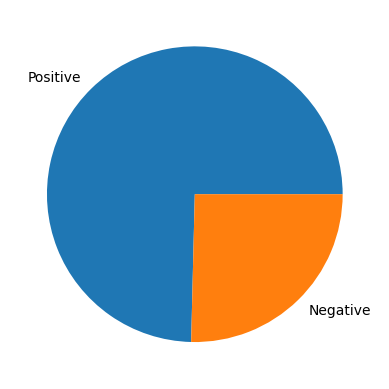

In [63]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [64]:
!pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]


In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9454, 1146) (9454,)


In [66]:
y_train_smote.value_counts()

label
1    4727
0    4727
Name: count, dtype: int64

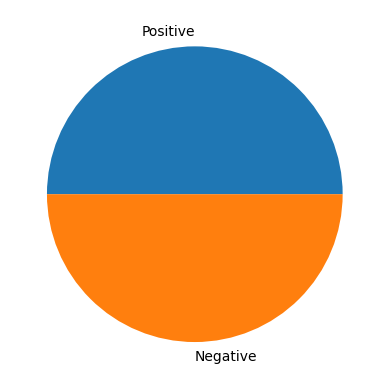

In [67]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [69]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [75]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.917
	Recall = 0.969
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.875
	Precision = 0.721
	Recall = 0.856
	F1-Score = 0.783


In [76]:

mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.905
	Precision = 0.867
	Recall = 0.957
	F1-Score = 0.91
Testing Scores:
	Accuracy = 0.864
	Precision = 0.679
	Recall = 0.918
	F1-Score = 0.781


In [77]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.835
	Precision = 0.7
	Recall = 0.65
	F1-Score = 0.674


In [78]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.873
	Precision = 0.767
	Recall = 0.743
	F1-Score = 0.755


In [82]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.981
	Precision = 0.966
	Recall = 0.997
	F1-Score = 0.981
Testing Scores:
	Accuracy = 0.881
	Precision = 0.753
	Recall = 0.813
	F1-Score = 0.782


In [ ]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

In [83]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)